In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
base_path = ''
annotation_path = os.path.join(base_path,'Annotations')
train_folders_path = os.path.join(base_path,'train')
validation_folders_path = ''
test_folders_path = os.path.join(base_path,'test')

img_height,img_width = 224,224               # must be a multiple of 32

In [18]:
import imghdr
from PIL import Image

def preprocess_image(img_path, model_image_size):
    image_type = imghdr.what(img_path)
    image = Image.open(img_path)
    resized_image = image.resize(tuple(reversed(model_image_size)), Image.BICUBIC)
    image_data = np.array(resized_image, dtype='float32')
    image_data /= 255.
    image_data = np.expand_dims(image_data, 0)  # Add batch dimension.
    return image_data


Download the weights from this link and put the h5 file in the same folder as your notebook.
https://drive.google.com/file/d/1zrf9y1gEdQStWT6SGVfFJjZepIraEOBq/view?usp=sharing

In [19]:
#!pip install tf2_yolov4
from tf2_yolov4.anchors import YOLOV4_ANCHORS
from tf2_yolov4.model import YOLOv4

In [20]:
model = YOLOv4(
    input_shape=(img_height, img_width, 3),
    anchors=YOLOV4_ANCHORS,
    num_classes=80,
    training=False,
    yolo_max_boxes=100,
    yolo_iou_threshold=0.5,
    yolo_score_threshold=0.5,
)

model.load_weights("./yolov4.h5")
model.summary()

#https://github.com/sicara/tf2-yolov4/blob/master/tf2_yolov4/model.py for details of the model

Model: "YOLOv4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
CSPDarknet53 (Model)            [(None, 7, 7, 1024), 26652512    input_16[0][0]                   
__________________________________________________________________________________________________
YOLOv4_neck (Model)             [(None, 7, 7, 512),  15857152    CSPDarknet53[1][0]               
                                                                 CSPDarknet53[1][1]               
                                                                 CSPDarknet53[1][2]               
_____________________________________________________________________________________________

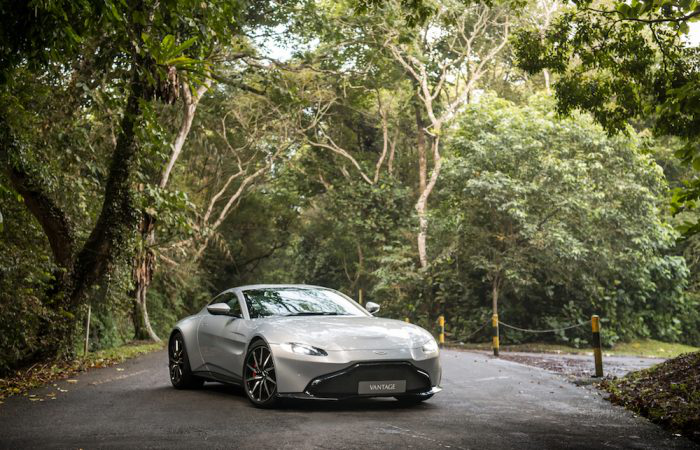

In [21]:
testimage = preprocess_image(os.path.join(base_path,,,), (224,224))

In [22]:
boxes, scores, classes, valid_detections = model.predict(testimage)

In [23]:
CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

In [9]:
import matplotlib.pyplot as plt

def plot_results(pil_img, boxes, scores, classes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()

    for (xmin, ymin, xmax, ymax), score, cl in zip(boxes.tolist(), scores.tolist(), classes.tolist()):
        if score > 0:
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                      fill=False, color=COLORS[cl % 6], linewidth=3))
            text = f'{CLASSES[cl]}: {score:0.2f}'
            ax.text(xmin, ymin, text, fontsize=15,
                    bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

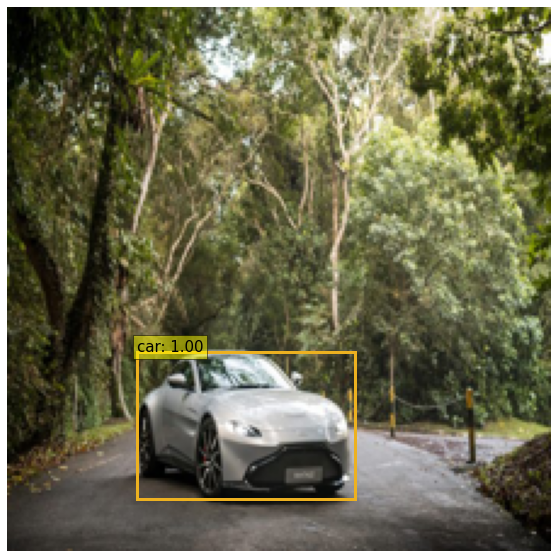

In [10]:
plot_results(
    testimage[0],
    boxes[0] * [img_width, img_height, img_width, img_height],
    scores[0],
    classes[0].astype(int),
)